# Classification
## MNIST Dataset

In [1]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/share/apps/python/3.8.6/intel/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# fetch MNIST dataset from OpenML.org
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

/home/ac7407/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/ac7407/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/ac7407/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/ac7407/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/ac7407/.local/lib/python3.8/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `

### Since MNIST datasets contain images, this is not good for dataframes.

In [3]:
# convert data as numpy array
X, y = mnist.data, mnist.target
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
X.shape

(70000, 784)

In [5]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
y.shape

(70000,)

### There are 70000 images and 784 features. 

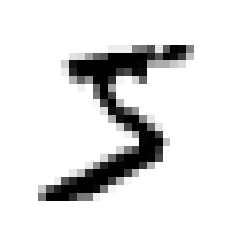

In [7]:
# look at one digit from dataset by reshaping to 28x28 array and display using imshow()
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

### The number looks like a '5', and that can be further confirmed by checking the first index of 'y'.

In [8]:
y[0]

'5'

In [9]:
# create a training set (60000 images) and a test set (10000 images)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Training a binary classifier
### Identification of one digit 

In [10]:
# only identify the digit '5' out of all images 
# distinguish between two classes - '5' and not '5'
# create target vectors for classification task
y_train_5 = (y_train == '5')  # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

In [11]:
# use stochastic gradient descent (SGD) classifier to handle large datasets efficiently 
# train on the whole training set
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict([some_digit])

array([ True])

## Performance Evaluation
### Cross-validation

In [12]:
# evaluate SGD model using k-fold cross-validation with three folds
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [13]:
# use a dummy classifier that classifies every single image in the most frequent class (non '5')
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))  # prints False: no 5s detected

cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

False


array([0.90965, 0.90965, 0.90965])

### As seen, using the SGD model yields ~95-96% accuracy whereas using a dummy classifier yields ~90% accuracy when always guessing that the image would NOT be '5'.

### A better way to evaluate the performance of a model is to look at the confusion matrix.

### Confusion matrices counts the number of times instances of class A are classified as class B, for all A/B pairs.

In [14]:
# use cross_val_predict() function to perform k-fold cross-validation and return predictions made on each test fold
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [15]:
# get confusion matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

### Each row in the confusion matrix represents an actual class, and each column represents a predicted class.
### As seen, 53892 were correctly classified as non 5's, 687 were wrongly classified as 5's, 1891 were wrongly classified as non 5's, and 3530 were correctly classified as 5's.
### Below is an example of what a perfect confusion matrix looks like.

In [16]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

### Precision: TP/(TP+FP)
### Recall: TP/(TP+FN)

In [17]:
# compute precision and recall 
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [18]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

### F1 score is the combination between precision and recall. 

In [19]:
# compute f1 score 
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

### Increasing precision decreases recall.
### Decision thresholds: increasing leads to higher precision, decreasing leads to higher recall. 
### Although scikit-learn doesn't let you set threshold directly, you can still see decision scores used to make predictions.

In [20]:
# check decision scores and return scores for each instance
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [21]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [22]:
# raising threshold to 3000 will decrease recall
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

### Deciding which threshold to use involves plotting precision and recall as functions of the threshold value.

In [23]:
# get scores of all instances in the training set 
# return decision scores instead of predictions
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [24]:
# compute precision and recall for all possible thresholds
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

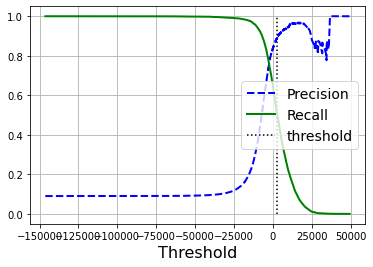

In [25]:
# plot precision and recall as functions of the threshold value using matplotlib
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
# beautify the figure: add grid, legend, axis, labels, and circles
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.xlabel("Threshold", fontsize=16)
plt.show()

### At the threshold value, the precision value is 90% and the recall value is 50%.

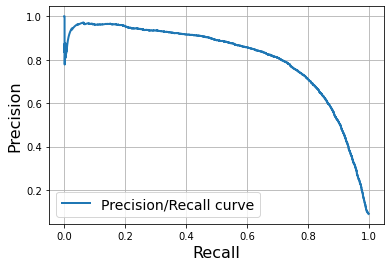

In [26]:
# create a precision vs. recall curve (PRC)
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
# beautify the figure: add labels, grid, legend, arrow, and text
plt.grid(True)
plt.legend(loc="lower left", fontsize=14)
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.show()

In [27]:
# use numpy's argmax() method to search for the lowest threshold for 90% precision
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

In [28]:
# develop a 90% precision classifier by making predictions on the training set
# check precision
y_train_pred_90 = (y_scores >= threshold_for_90_precision)
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [29]:
# check recall
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.4799852425751706

### Create a receiver operating characteristic curve (ROC curve) by plotting true positive rate against false positive rate.

In [30]:
# compute true positive rate and false positive rate using sklearn's roc_curve() function
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

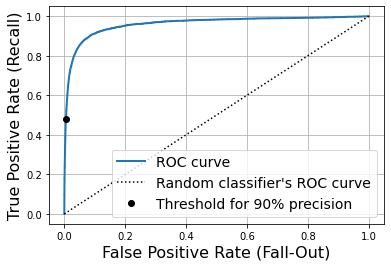

In [31]:
# create a ROC curve
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")
# beautify the figure: add labels, grid, legend, arrow, and text
plt.grid(True)
plt.legend(loc="lower right", fontsize=14)
plt.xlabel("False Positive Rate (Fall-Out)", fontsize=16)
plt.ylabel("True Positive Rate (Recall)", fontsize=16)
plt.show()

### The higher the recall, the higher the false positive rate. 
### Another way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will have AUC=1 and a purely random classifier will have AUC=0.5.

In [32]:
# estimate AUC of ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [33]:
# create a random forest classifier to compare with SGD classifier on PR curve and F1 score
# look at class probabilities for first two images in training set
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

### The model predicts the first image is positive ('5') with 89% probability and that the second image is negative (not '5') with 99% probability.
### Because each image is either positive or negative, the probabilities in each row MUST add up to 100%.

In [34]:
# pass estimated probabilities of positive class into precision_recall_curve() function
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train_5, y_scores_forest)

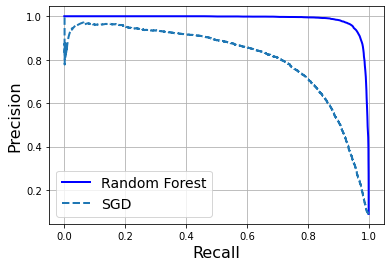

In [35]:
# plot precision-recall (PR) curve
# plot PR curve
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")
# beautify the figure: add labels, grid, and legend
plt.grid(True)
plt.legend(loc="lower left", fontsize=14)
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.show()

### As seen from above, the random forest curve looks much better than SGD.

In [36]:
# print F1 score
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5  # positive proba ≥ 50%
f1_score(y_train_5, y_train_pred_forest)


0.9274509803921569

In [37]:
# print ROC AUC score
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

## Multiclass Classification
### Distinguishing between more than two classes (e.g. creating a system that can classify digit images into 10 classes).
### 0-detector, 1-detector, and so on.
### From there, when classifying an image, get the decision score from each classifier of that image and select the class whose classifier outputs the highest score. This strategy is called one-versus-the-rest (OVR).
### Another strategy is the one-versus-one (OVO) strategy. This is when a binary classifier is trained for every pair of digits.

In [38]:
# train the first 2000 images to detect 0-9 digits
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])  # y_train, not y_train_5

SVC(random_state=42)

In [39]:
# make a prediction on an image
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [40]:
# call decision_function() method to return 10 scores per instance
# each class gets a score equal to the number of won duel plus/minus a small tweak to break ties
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [41]:
class_id = some_digit_scores.argmax()
class_id

5

### As seen from above, the highest score is 9.3 and it corresponds to class 5.

In [42]:
# look up class labels in cases where index for each class does NOT match with the class itself
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [43]:
svm_clf.classes_[class_id]

'5'

### There is also another option where you can force sklearn to use either OVR or OVO by importing either the OneVsOneClassifier or OneVsRestClassifier classes.

In [44]:
# use one-versus-rest strategy to train the first 2000 images to detect 0-9 digits
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [45]:
# make a prediction
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [46]:
# check the number of trained classifiers
len(ovr_clf.estimators_)

10

In [47]:
# train SGD classifier on multiclass dataset and make predictions 
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [48]:
# return one value per class using decision_function() method
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [49]:
# cross-evaluate the model
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [50]:
# scale data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

## Error Analysis

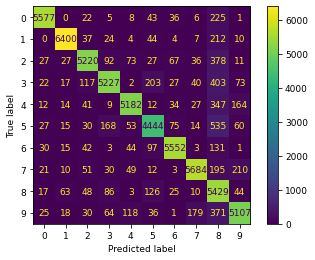

In [51]:
# cross-validate model by plotting colored confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

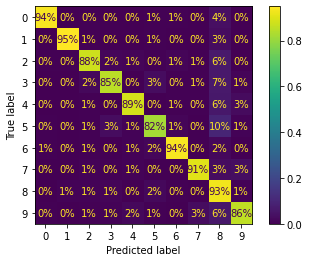

In [52]:
# express values as percentages
plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize="true", values_format=".0%")
plt.show()

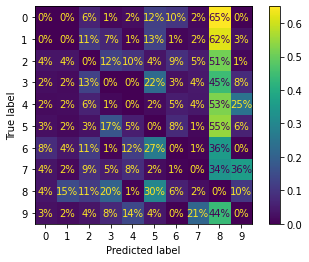

In [53]:
# make errors stand out more by putting zero weight on correct predictions
sample_weight = (y_train_pred != y_train)
plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
plt.show()

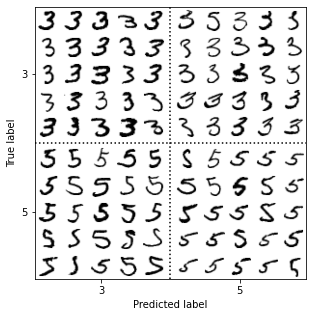

In [54]:
# train model to classify '3' from '5' by plotting them in a confusion matrix style
cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

# extra code – this cell generates and saves Figure 3–11
size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

## Multilabel Classification
### Cases where classifiers can output multiple classes for each instance. This can be used for face recognition, for instance.

In [55]:
# classify large digits (7-9) as either even/odd and train model
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [57]:
# demonstrate that prediction will output two labels
knn_clf.predict([some_digit])

array([[False,  True]])

In [58]:
print("As seen, the classifier correctly analyzed 5 as a small digit and as an odd number.")

As seen, the classifier correctly analyzed 5 as a small digit and as an odd number.


In [59]:
# compute average F1 score across all labels
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

## Chain Classification
### Models organized as a chain, where when a model makes a prediction, it uses the input features plus all the predictions of the models that come before it in a chain

In [60]:
# create and train a chain classifier to analyze 2000 images in the training set
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [61]:
# make predictions 
chain_clf.predict([some_digit])

array([[0., 1.]])

## Multioutput Classification
### Generalization of multilabel classification where each label can be a multiclass (i.e. it can have more than two possible values). 

In [62]:
# create training and test sets by taking MNIST images and adding noise to pixel intensities with numpy's randint()
# function
np.random.seed(42)  # to make this code example reproducible
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

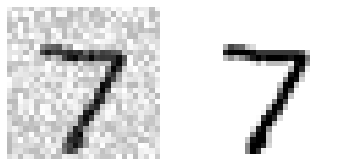

In [63]:
# generate noisy/clean images
plt.subplot(121); plot_digit(X_test_mod[0])
plt.subplot(122); plot_digit(y_test_mod[0])
plt.show()

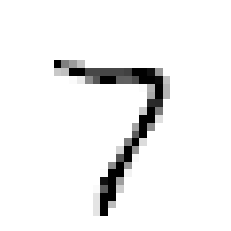

In [64]:
# train classifier to clean up image
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
plt.show()